#Profiling inicial del cálculo de compoentnes disjuntos

El cálculo de componentes disjuntos de todo el arreglo desde t1 = 101 hasta t2 = 1000 toma aproximandamente 2 horas. Debido a que el buffer del profiler se llena, se usó solamente t = 1999 para identificar las secciones más pesadas. Este proceso toma aproximadamente 8s.  

###Carga inicial de los datos, filtrado y obtención del CSD

In [1]:
cd("/Users/Nes/Desktop/NeuroCiencias/JuliaExperiments/Parallel-Neuroscience/ComponentesDisjuntos");

In [2]:
include("funcionesCentrosDeMasa.jl");

In [3]:
include("cargaYFiltra.jl");

INFO: Loading help data...


In [19]:
#Contiene el método al que se le aplica el profiling

In [5]:
include("minicomponentesDisjuntos.jl");

In [12]:
#Ejecución inicial para forzar la compilación

In [6]:
miniComponentesDisjuntos(CSD);

###Profiling

Medición inicial del tiempo. El Profiler es estadístico y funciona con muestreo. No ofrece cobertura linea por línea pero despliega un aproximado del costo en la columna count. http://docs.julialang.org/en/release-0.4/manual/profile/

In [15]:
@time miniComponentesDisjuntos(CSD);

elapsed time: 8.854391545 seconds (920321688 bytes allocated, 69.60% gc time)


In [7]:
@profile miniComponentesDisjuntos(CSD);

In [9]:
Profile.print(format=:flat)

 Count File                       Function                                 Line
     4 ...lia/lib/julia/sys.dylib ==                                         -1
    14 ...lia/lib/julia/sys.dylib hash                                       -1
    38 ...lia/lib/julia/sys.dylib hash_64_64                                 -1
     2 ...lia/lib/julia/sys.dylib vcat                                       -1
     1 ...lia/lib/julia/sys.dylib zeros                                      -1
  6852 ....3/IJulia/src/IJulia.jl eventloop                                 141
  6852 .../src/execute_request.jl execute_request_0x535c5df2                177
     1 ...ncionesCentrosDeMasa.jl vecindad8                                  76
     3 ...ncionesCentrosDeMasa.jl vecindad8                                  77
     2 ...ncionesCentrosDeMasa.jl vecindad8                                  83
     7 ...componentesDisjuntos.jl miniComponentesDisjuntos                   29
  3244 ...componentesDisjuntos.jl miniCo

El problema parece estar en las líneas 30 y 32 de la función minicomponentes.

* **(30)  if in(v, lista):**Llama a una rutina de mapreduce según el Profiler.
    
* **(32)  deleteat!(lista, indexin({v}, lista)):**Parece ser una función eficiente. 


  

In [ ]:
#NO ejecutar
function _deleteat!(a::Vector, i::Integer, delta::Integer)
    n = length(a)
    last = i+delta-1
    if i-1 < n-last
        _deleteat_beg!(a, i, delta)
    else
        _deleteat_end!(a, i, delta)
    end
    return a
end

function _deleteat_beg!(a::Vector, i::Integer, delta::Integer)
    if i > 1
        ccall(:memmove, Ptr{Void}, (Ptr{Void}, Ptr{Void}, Csize_t),
              pointer(a, 1+delta), pointer(a, 1), (i-1)*elsize(a))
    end
    ccall(:jl_array_del_beg, Void, (Any, UInt), a, delta)
    return a
end

function _deleteat_end!(a::Vector, i::Integer, delta::Integer)
    n = length(a)
    if n >= i+delta
        ccall(:memmove, Ptr{Void}, (Ptr{Void}, Ptr{Void}, Csize_t),
              pointer(a, i), pointer(a, i+delta), (n-i-delta+1)*elsize(a))
    end
    ccall(:jl_array_del_end, Void, (Any, UInt), a, delta)
    return a
end

In [23]:
#Visualización del resultado

In [8]:
using ProfileView

* Double-clicking on a bar will zoom in the graph around the bar.

* Double-clicking on the background will zoom out to show the entire graph.

* Click-drag anywhere on the graph will allow for panning.

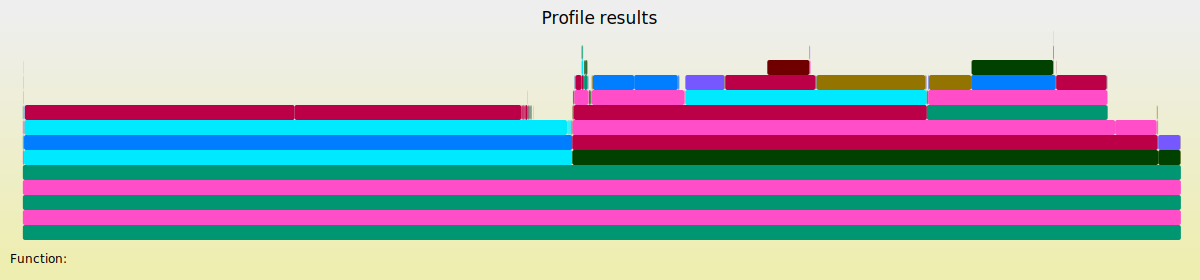

In [10]:
ProfileView.view()